# MobileNet

In [11]:
import torch
import torchvision
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [2]:
model = torchvision.models.mobilenet_v2(pretrained=True)

In [3]:
# model.eval()

In [4]:
# model.classifier

Sequential(
  (0): Dropout(p=0.2)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [3]:
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_

In [5]:
# model.features[0][0].weight

In [60]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [54]:
import matplotlib.pyplot as plt

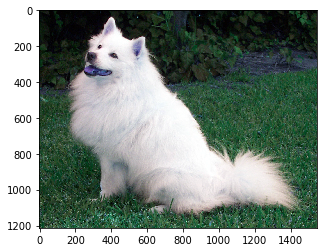

In [55]:
plt.imshow(cv2.imread(filename))

In [61]:
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model_test(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
# print(torch.nn.functional.softmax(output[0], dim=0))

RuntimeError: The expanded size of the tensor (224) must match the existing size (800) at non-singleton dimension 2.  Target sizes: [3, 224, 224].  Tensor sizes: [3, 800, 800]

In [19]:
output.shape[0]

1

In [17]:
probs = torch.nn.functional.softmax(output[0], dim=0)

In [26]:
len(probs)

1000

In [21]:
output.max()

tensor(3.0955)

In [23]:
probs.max()

tensor(0.0133)

In [24]:
def sigmoid(x):
    return (1 / 1 + np.exp(-x))


In [55]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0))
    return e_x / e_x.sum(axis=0)

In [31]:
sigmoid(3.0955)

1.0452523806124583

In [32]:
sigmoid(output[0].max())

tensor(1.0453)

In [ ]:
image = 

In [9]:
transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [ ]:
image = Image.fromarray(image)

## MobileNetV_2 Model

In [63]:
model.classifier[1].in_features

1280

We want the backbone to be MobileNet an FasterRCNN object detection

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

num_classes = 2    # 1 class is person + background

# get the in_features from the FasterRCNN _ ResNet50 model
in_features = model.roi_heads.box_predictor.cls_score.in_features
# and pass those features into the FastRCNNPredictor

# replace the model head with FastRCNNPredictor head
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes )

In [6]:
backbone = torchvision.models.mobilenet_v2(pretrained=True).features

backbone.out_channels = 1280

anchor_generator = AnchorGenerator(sizes=((32, 62, 128, 256, 512),),
                                   aspect_ratios = ((0.5, 1.0, 2.0),))

roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names = [0],
                                                output_size=7,
                                                sampling_ratio=2)


In [7]:
model = FasterRCNN(backbone, 
                   num_classes=2,
                  rpn_anchor_generator=anchor_generator,
                  box_roi_pool = roi_pooler)

In [8]:
# model.eval()

In [14]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [15]:
input_image = Image.open(filename)

In [16]:
input_image.shape

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [17]:
transform = transforms.Compose([
    transforms.Resize(34),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [18]:
input_tensor = transform(input_image)

In [19]:
input_batch = input_tensor.unsqueeze(0)

In [20]:
input_batch.shape

torch.Size([1, 3, 32, 32])

In [47]:
model_test.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [48]:
output = model_test(input_batch)

RuntimeError: The expanded size of the tensor (32) must match the existing size (800) at non-singleton dimension 2.  Target sizes: [3, 32, 32].  Tensor sizes: [3, 800, 800]

In [22]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps

In [34]:
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
# predictions = model(x) 

In [44]:
model_test = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [45]:
model_test.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [101]:
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps

In [62]:
w = 200
h = 300

arr = np.array([w, h, w, h])

In [63]:
arr

array([200, 300, 200, 300])